# CS5950 Course Project

This project recaps and systematises work that has been done in practical sessions.  The aim of the project is to give you the experience of trying to develop a neural network classifier (or regressor), involving setting up a model, optimising the amount of regularisatio, investigating its performance, and devising a new model. 

You should do your work in this notebook, filling in the sections below. To do the work, you may re-use code from ***any of the lab-session sheets provided so far***. (In fact, you should be able to do nearly the entire project using code taken from previous lab sessions.) 

Please complete this workbook and submit it on Moodle, with all outputs (numbers and graphs) visible and included. 

The deadline for this assignment is **Friday March 16th, 23:59pm**

Please write your student number **here**:     
so that I have an identifier of which worksheet I am marking, to prevent any confuusion ! 

## Set up dataset

You may choose any of the datasets included with Keras, or used in the course so far (including, for example, the connectivity data, or even the 2D data we used back in the second week). (It is a free country and you may use other data, but I recommend you not to do so, because 

I would recommend that you use either the MNIST data or the MNIST-fashion data, which is a drop-in replacement for MNIST (same size data format, same number of classes, same number of training and test examples). 

In setting up the data, you should set up a training set and a test set. The test set should be large enough to give a reasonably accurate assessment of the error-rate (or loss) of your models: preferably at least 10,000 examples.

For the learning curve experiment (below), you will need to construct training sets of different sizes, with the largest at least 10 times the smallest. For the MNIST data, for example, your smallest training set might be 500, with sizes 500, 1000, 2000, 4000, 8000, 16000, 32000, and perhaps 60000 if you have time. (You get no extra marks for doing very long experiments.) 

## Set up model 

Set up a Keras model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000). 


Plot the loss and error rate as a function of training epochs. 


###  1.  Assessment of initial model:    ***12 marks***

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm 
import tensorflow as tf
from keras import layers, optimizers
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from keras.layers import BatchNormalization, Activation
from keras.utils.np_utils import to_categorical

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape([60000,28,28,1])
x_test = x_test.reshape([10000,28,28,1])
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)



In [6]:
# your code here (you can freely used and modify code from course lab-sheets throughout this project)


model=Sequential()
model.add(Dense(30, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Activation('relu'))                            
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])
train_size = 2000
history= model.fit( x_train[:train_size,:,:,:],y_train_one_hot[:train_size,:],
                        epochs=20, batch_size=64, shuffle=True,
                       validation_data=(x_test,y_test_one_hot))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 28, 28, 30)        60        
_________________________________________________________________
flatten_3 (Flatten)          (None, 23520)             0         
_________________________________________________________________
activation_11 (Activation)   (None, 23520)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 30)                705630    
_________________________________________________________________
activation_12 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 30)                930       
_________________________________________________________________
activation_13 (Activation)   (None, 30)                0         
__________

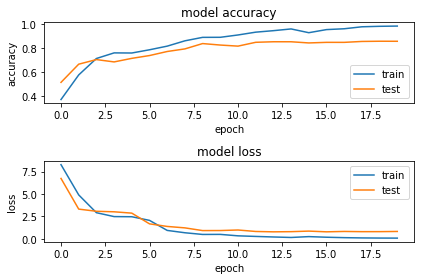

In [7]:
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

### 2.  Regularisation experiment:  ***12 marks***

Now select a type of regularisation (which may be L2, L1, L12, or dropout) and train your initial model with different amounts of regularisation. 

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse. 

Train your model multiple times, applying different amounts of regularisation, and plot a graoph showing the effect of different amounts of regularisation. 

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount? 

In [8]:
def parameters(probs,train_size):
    model=Sequential()
    model.add(Dense(30, input_shape=(28,28,1)))
    model.add(Dropout(probs))
    model.add(Activation('relu'))
    model.add(Dropout(probs))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dropout(probs))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dropout(probs))
    model.add(Dense(30))
    model.add(Flatten())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit( x_train[:train_size,:,:,:],y_train_one_hot[:train_size,:],
                            epochs=20, batch_size=64, shuffle=True,
                           validation_data=(x_test,y_test_one_hot))
    val_acc,val_loss= model.evaluate(x_test,y_test_one_hot)
     
    return(val_acc,val_loss)

In [9]:
probs=np.array([0,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.8])
val_losses=[]
val_accs=[]
for i in range(0,len(probs)):
 
    val_loss,val_acc=parameters(probs[i],2000)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    


Train on 2000 samples, validate on 10000 samples
Epoch 1/20
2000/2000 [==============================] - 1s 672us/step - loss: 1.5277 - acc: 0.6920 - val_loss: 0.5070 - val_acc: 0.8487
Epoch 2/20
2000/2000 [==============================] - 1s 454us/step - loss: 0.3745 - acc: 0.8990 - val_loss: 0.4342 - val_acc: 0.8652
Epoch 3/20
2000/2000 [==============================] - 1s 452us/step - loss: 0.2742 - acc: 0.9235 - val_loss: 0.4505 - val_acc: 0.8773
Epoch 4/20
2000/2000 [==============================] - 1s 447us/step - loss: 0.2371 - acc: 0.9300 - val_loss: 0.4805 - val_acc: 0.8766
Epoch 5/20
2000/2000 [==============================] - 1s 452us/step - loss: 0.2074 - acc: 0.9345 - val_loss: 0.5792 - val_acc: 0.8568
Epoch 6/20
2000/2000 [==============================] - 1s 444us/step - loss: 0.1933 - acc: 0.9340 - val_loss: 0.5160 - val_acc: 0.8657
Epoch 7/20
2000/2000 [==============================] - 1s 450us/step - loss: 0.1371 - acc: 0.9575 - val_loss: 0.5702 - val_acc: 0.8744

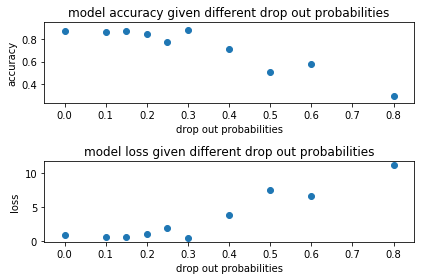

In [10]:
plt.subplot(2,1,1)
plt.scatter(probs,val_accs)
plt.title('model accuracy given different drop out probabilities')
plt.ylabel('accuracy')
plt.xlabel('drop out probabilities')


plt.subplot(2,1,2)
plt.scatter(probs,val_losses)
plt.title('model loss given different drop out probabilities')
plt.ylabel('loss')
plt.xlabel('drop out probabilities')
    
plt.tight_layout()

### 3.  Learning curve experiment:  ***12 marks***

Now train your model (with the amount of regularisation you selected) on different amounts of training data. 

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ? 

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is. 

In [13]:
train_size=np.array([ 500, 1000, 2000, 4000, 8000, 16000, 32000])
val_losses_t=[]
val_accs_t=[]
for i in range(0,len(train_size)):
    val_loss_t,val_acc_t=parameters(0.3,train_size[i])
    val_losses_t.append(val_loss_t)
    val_accs_t.append(val_acc_t)

Train on 500 samples, validate on 10000 samples
Epoch 1/20
500/500 [==============================] - 2s 4ms/step - loss: 11.3417 - acc: 0.2620 - val_loss: 9.5207 - val_acc: 0.3740
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 9.0869 - acc: 0.4180 - val_loss: 9.1956 - val_acc: 0.4067
Epoch 3/20
500/500 [==============================] - 1s 1ms/step - loss: 8.7748 - acc: 0.4480 - val_loss: 9.1321 - val_acc: 0.4106
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 8.6499 - acc: 0.4560 - val_loss: 9.0397 - val_acc: 0.4172
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: 8.4196 - acc: 0.4700 - val_loss: 8.8646 - val_acc: 0.4322
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 8.2558 - acc: 0.4820 - val_loss: 8.8066 - val_acc: 0.4352
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 8.1872 - acc: 0.4840 - val_loss: 8.8817 - val_acc: 0.4250
Epoch 8/20
500/500 [=======

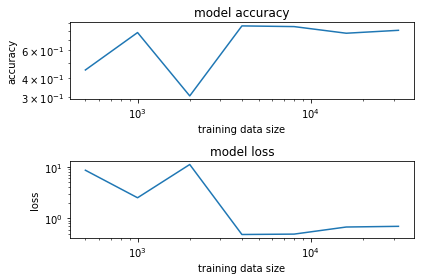

In [14]:
plt.subplot(2,1,1)
plt.plot(train_size,val_accs_t)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('training data size')
plt.xscale('log')
plt.yscale('log')

plt.subplot(2,1,2)
plt.plot(train_size,val_losses_t)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('training data size')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()

### 4. Second model:   *** 14 marks ***

Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeata sections 2 (regularisation experiment), and determine whether it has better validation set performance than the first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data). 

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  

In [15]:
model_1 = Sequential()

model_1.add(Conv2D(32, (2, 2), input_shape=(28,28,1)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (2, 2)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(64,(2, 2)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (2, 2)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))
model_1.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])
train_size = 4000
history_1= model_1.fit( x_train[:train_size,:,:,:],y_train_one_hot[:train_size,:],
                        epochs=20, batch_size=64, shuffle=True,
                       validation_data=(x_test,y_test_one_hot))

Train on 4000 samples, validate on 10000 samples
Epoch 1/20
4000/4000 [==============================] - 5s 1ms/step - loss: 5.4203 - acc: 0.5553 - val_loss: 5.1158 - val_acc: 0.6337
Epoch 2/20
4000/4000 [==============================] - 2s 486us/step - loss: 4.6442 - acc: 0.6743 - val_loss: 3.2873 - val_acc: 0.7649
Epoch 3/20
4000/4000 [==============================] - 2s 490us/step - loss: 3.3196 - acc: 0.7622 - val_loss: 3.3300 - val_acc: 0.7525
Epoch 4/20
4000/4000 [==============================] - 2s 493us/step - loss: 1.2847 - acc: 0.8905 - val_loss: 0.1641 - val_acc: 0.9529
Epoch 5/20
4000/4000 [==============================] - 2s 488us/step - loss: 0.0830 - acc: 0.9758 - val_loss: 0.1789 - val_acc: 0.9562
Epoch 6/20
4000/4000 [==============================] - 2s 483us/step - loss: 0.0603 - acc: 0.9802 - val_loss: 0.2177 - val_acc: 0.9534
Epoch 7/20
4000/4000 [==============================] - 2s 479us/step - loss: 0.0476 - acc: 0.9848 - val_loss: 0.4275 - val_acc: 0.9151
E

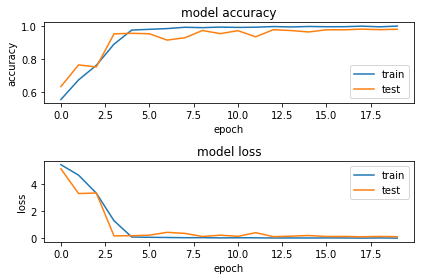

In [16]:
plt.subplot(2,1,1)
plt.plot(history_1.history['acc'])
plt.plot(history_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

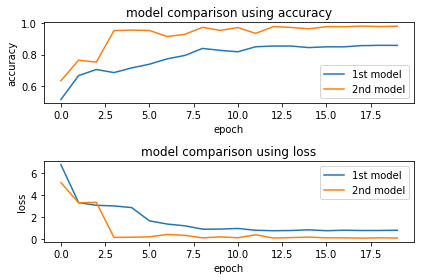

In [18]:
plt.subplot(2,1,1)
plt.plot(history.history['val_acc'])
plt.plot(history_1.history['val_acc'])
plt.title('model comparison using accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['1st model', '2nd model'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['val_loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model comparison using loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1st model', '2nd model'], loc='upper right')

plt.tight_layout()


In [19]:
def parameters_1(prob,train_size):
    model_1 = Sequential()
    model_1.add(Conv2D(32, (2, 2), input_shape=(28,28,1)))
    model_1.add(BatchNormalization())
    model_1.add(Activation('relu'))
    model_1.add(Conv2D(32, (2, 2)))
    model_1.add(BatchNormalization())
    model_1.add(Activation('relu'))
    model_1.add(MaxPooling2D(pool_size=(2,2)))
    model_1.add(Conv2D(64,(2, 2)))
    model_1.add(BatchNormalization())
    model_1.add(Activation('relu'))
    model_1.add(Conv2D(64, (2, 2)))
    model_1.add(BatchNormalization())
    model_1.add(Activation('relu'))
    model_1.add(MaxPooling2D(pool_size=(2,2)))
    model_1.add(Flatten())
    model_1.add(Dense(512))
    model_1.add(Activation('relu'))
    model_1.add(Dropout(prob))
    model_1.add(Dense(10))
    model_1.add(Activation('softmax'))
    model_1.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])

    model_1.fit( x_train[:train_size,:,:,:],y_train_one_hot[:train_size,:],
                            epochs=20, batch_size=64, shuffle=True,
                           validation_data=(x_test,y_test_one_hot))
    validation_acc,validation_loss= model_1.evaluate(x_test,y_test_one_hot)
     
    return(validation_acc,validation_loss)

In [20]:
prob=np.array([0,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.8])
validation_losses=[]
validation_accs=[]
for i in range(0,len(prob)):
 
    validation_loss,validation_acc=parameters_1(prob[i],4000)
    validation_losses.append(validation_loss)
    validation_accs.append(validation_acc)

Train on 4000 samples, validate on 10000 samples
Epoch 1/20
4000/4000 [==============================] - 4s 1ms/step - loss: 5.4987 - acc: 0.5643 - val_loss: 4.9881 - val_acc: 0.6463
Epoch 2/20
4000/4000 [==============================] - 2s 495us/step - loss: 4.9612 - acc: 0.6653 - val_loss: 5.2222 - val_acc: 0.6055
Epoch 3/20
4000/4000 [==============================] - 2s 487us/step - loss: 1.9580 - acc: 0.8320 - val_loss: 0.3362 - val_acc: 0.9072
Epoch 4/20
4000/4000 [==============================] - 2s 497us/step - loss: 0.1171 - acc: 0.9680 - val_loss: 0.1052 - val_acc: 0.9687
Epoch 5/20
4000/4000 [==============================] - 2s 492us/step - loss: 0.0852 - acc: 0.9748 - val_loss: 0.1487 - val_acc: 0.9625
Epoch 6/20
4000/4000 [==============================] - 2s 493us/step - loss: 0.0441 - acc: 0.9848 - val_loss: 0.1117 - val_acc: 0.9719
Epoch 7/20
4000/4000 [==============================] - 2s 496us/step - loss: 0.0463 - acc: 0.9865 - val_loss: 0.1084 - val_acc: 0.9735
E

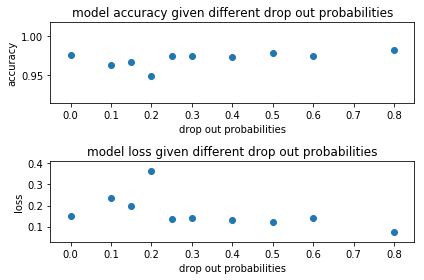

In [21]:
plt.subplot(2,1,1)
plt.scatter(prob,validation_accs)
plt.title('model accuracy given different drop out probabilities')
plt.ylabel('accuracy')
plt.xlabel('drop out probabilities')


plt.subplot(2,1,2)
plt.scatter(prob,validation_losses)
plt.title('model loss given different drop out probabilities')
plt.ylabel('loss')
plt.xlabel('drop out probabilities')
    
plt.tight_layout()

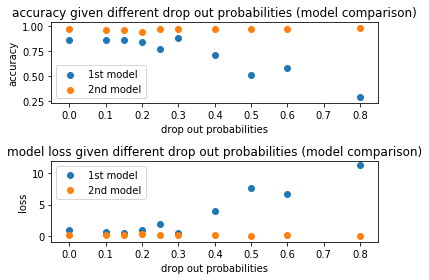

In [24]:
plt.subplot(2,1,1)
plt.scatter(probs,val_accs)
plt.scatter(prob,validation_accs)
plt.title('accuracy given different drop out probabilities (model comparison)')
plt.ylabel('accuracy')
plt.xlabel('drop out probabilities')
plt.legend(['1st model', '2nd model'], loc='lower left')

plt.subplot(2,1,2)
plt.scatter(probs,val_losses)
plt.scatter(prob,validation_losses)
plt.title('model loss given different drop out probabilities (model comparison)')
plt.ylabel('loss')
plt.xlabel('drop out probabilities')
plt.legend(['1st model', '2nd model'], loc='upper left')    
plt.tight_layout()

In [27]:
train_size=np.array([ 500, 1000, 2000, 4000, 8000, 16000, 32000])
validation_losses_t=[]
validation_accs_t=[]
for i in range(0,len(train_size)):
    validation_acc_t,validation_loss_t=parameters_1(0.5,train_size[i])
    validation_losses_t.append(validation_loss_t)
    validation_accs_t.append(validation_acc_t)

Train on 500 samples, validate on 10000 samples
Epoch 1/20
500/500 [==============================] - 6s 13ms/step - loss: 6.0776 - acc: 0.2040 - val_loss: 1.1042 - val_acc: 0.6415
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 1.6695 - acc: 0.5100 - val_loss: 0.7543 - val_acc: 0.7764
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 0.9471 - acc: 0.7120 - val_loss: 0.5967 - val_acc: 0.8104
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 0.8094 - acc: 0.7360 - val_loss: 0.6300 - val_acc: 0.7876
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: 0.6799 - acc: 0.7980 - val_loss: 0.4706 - val_acc: 0.8516
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 0.6449 - acc: 0.7900 - val_loss: 0.4520 - val_acc: 0.8470
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 0.5961 - acc: 0.8000 - val_loss: 0.4791 - val_acc: 0.8431
Epoch 8/20
500/500 [=======

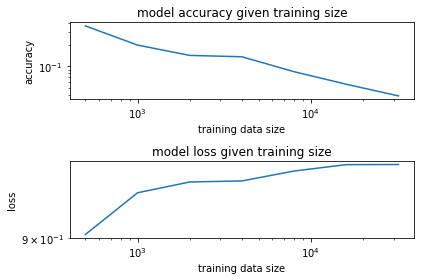

In [28]:
plt.subplot(2,1,1)
plt.plot(train_size,validation_accs_t)
plt.title('model accuracy given training size')
plt.ylabel('accuracy')
plt.xlabel('training data size')
plt.xscale('log')
plt.yscale('log')

plt.subplot(2,1,2)
plt.plot(train_size,validation_losses_t)
plt.title('model loss given training size')
plt.ylabel('loss')
plt.xlabel('training data size')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()

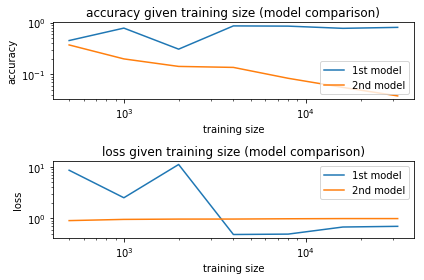

In [30]:
plt.subplot(2,1,1)
plt.plot(train_size,val_accs_t)
plt.plot(train_size,validation_accs_t)
plt.title('accuracy given training size (model comparison)')
plt.ylabel('accuracy')
plt.xlabel('training size')
plt.xscale('log')
plt.yscale('log')
plt.legend(['1st model', '2nd model'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(train_size,val_losses_t)
plt.plot(train_size,validation_losses_t)
plt.title('loss given training size (model comparison)')
plt.ylabel('loss')
plt.xlabel('training size')
plt.xscale('log')
plt.yscale('log')
plt.legend(['1st model', '2nd model'], loc='upper right')    
plt.tight_layout()